In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [4]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [5]:
offset = MonthEnd()
curr_month = report.index[-1]
prev_month, next_month = curr_month - offset, curr_month + offset

<h3>Отчётный месяц</h3>

In [6]:
'{:%B %Y}'.format(curr_month)

'October 2017'

<h2>Основная таблица</h2>

In [7]:
rep_2017 = report['2017':] # данные за 2017 год
rep_2017

channels                            goals                       
             yandex google go.mail.ru  bry cpc order basket contact measure
2017-01-31     2949   3084        375  511   0     4    243     355       8
2017-02-28     2701   2414        282  486   0     8    197     311      14
2017-03-31     2590   2283        284  426   0    11    157     298      11
2017-04-30     1890   2390        243  395   0    10    123     260      31
2017-05-31     2006   2584        110  389   0     4    106     221      29
2017-06-30     2048   2164        154  407   0     7    137     182      24
2017-07-31     2218   2172        147  316   0     4     81     221      16
2017-08-31     1995   1892         98  191   0     1     67     197      31
2017-09-30     1767   1596         62  123   0    10    100     151      16
2017-10-31     2027   2004         58   35   0     8     84     193      14

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [8]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2017-10-31      260    408         -4 -88   0    -2    -16      42      -2

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

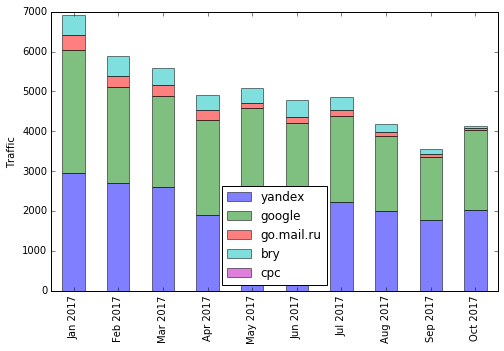

In [9]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
rep_2017.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in rep_2017.index]);

<h3>Линейная диаграмма изменений трафика</h3>

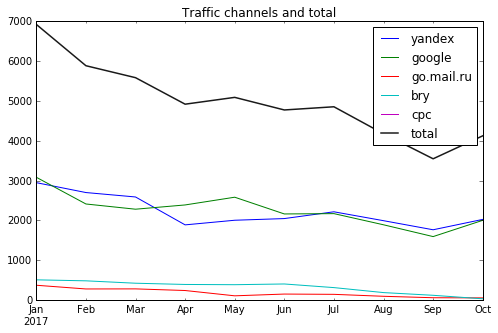

In [10]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
rep_2017.channels.plot(ax=ax);
rep_2017.channels.sum(axis=1).plot(color=(0,0,0), linewidth=1.5, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова и количество визитов</h3>

In [11]:
kw = 'keyword visit'.split()

In [12]:
data.visit = data.visit.astype(int)
data[kw]

keyword  visit
bing       0                                               np - /      3
           1                               входные двери недорого      2
           2                                     двери со скидкой      2
           3                                  двери эмалированные      2
           4                             np - /?cnt=catalog&r=300      1
           5                                          двери верда      1
           6                                         двери книжка      1
           7                                           двери купе      1
           8                                   двери межкомнатные      1
           9                                       двери под ключ      1
           10                                  двери с фурнитурой      1
           11                               дешевые входные двери      1
           12                                        ещщл-ещщлюкг      1
           13             ламинированые межкомнатные двери купить      1
go.mail.ru 0                                            (not set)     58
google     0                            np - /?cnt=catalog&r=2438    228
           1                                        полотно двери    134
           2                                               np - /    123
           3                            np - /?cnt=catalog&r=1428     95
           4                                     np - /?pid=pokaz     67
           5                               дверное полотно купить     11
           6                                      полотна дверные     10
           7                                    полотно для двери     10
           8                             np - /?cnt=catalog&r=114      7
           9                            np - /?cnt=catalog&r=1262      7
           10                             np - /?pid=menu-katalog      7
           11                              дверные полотна купить      6
           12                                     дверное полотно      5
           13                                     полотно дверное      5
           14                           np - /?cnt=catalog&r=1010      4
...                                                           ...    ...
yandex     752                       стеклянное полотно для двери      1
           753                    стеклянные двери для кухни фото      1
           754                 стеклянные двери цветные для кухни      1
           755                  стоимость дверного полотна 1 1 2м      1
           756     столплит дверки для кухни оля цена размер фото      1
           757                            сферические двери кухня      1
           758                              темная дверь на кухню      1
           759        толщина дверного полотна межкомнатной двери      1
           760   толщина дверного полотна межкомнатной двери solo      1
           761             толщина полотна 30 мм дверь где купить      1
           762                              толщина полотна двери      1
           763                 толщина полотна межкомнатной двери      2
           764         толщина полотна межкомнатной двери сколько      1
           765                    узкие распашные двери для кухни      1
           766               упор дверного полотна арт 404.74.000      1
           767                        установка дверей по полотну      1
           768                установка кухонных дверей в щелково      1
           769               устройство карусельной двери в кухне      1
           770                       фанерованные дверные полотна      1
           771                    фасадная дверь для кухни в икеа      1
           772                               фото дверей на кухню      1
           773  фурнитура дверная москва италия в наличии сало...      1
           774                         фурнитура для кухни дверцы      1
           775  фурнитура для раздвижных ме

<h3>Самые популярные ключевые слова по каждой поисковой системе</h3>

In [13]:
data[kw].xs(0, level=1)

,keyword,visit
bing,np - /,3
go.mail.ru,(not set),58
google,np - /?cnt=catalog&r=2438,228
rambler,двери гармошка купить,1
yahoo,np - /,2
yandex,(not set),985


<h3>Топ-5 запросов по каждой поисковой системе</h3>

In [14]:
data_grupped = data.groupby(level=0, axis=0) # группировка по поисковой системе
data_top5 = data_grupped[['keyword', 'visit']].apply(lambda x: x.ix[:5]) # топ-5 каждой ПС
data_top5.reset_index(level=0).drop('level_0', axis=1)

keyword  visit
bing       0                                             np - /      3
           1                             входные двери недорого      2
           2                                   двери со скидкой      2
           3                                двери эмалированные      2
           4                           np - /?cnt=catalog&r=300      1
go.mail.ru 0                                          (not set)     58
google     0                          np - /?cnt=catalog&r=2438    228
           1                                      полотно двери    134
           2                                             np - /    123
           3                          np - /?cnt=catalog&r=1428     95
           4                                   np - /?pid=pokaz     67
rambler    0                              двери гармошка купить      1
           1                           двери гармошка с принтом      1
           2                          двери с установкой москва      1
           3                            дверь гармошка в тушино      1
           4                       дорогие ламинированные двери      1
yahoo      0                                             np - /      2
           1                          np - /?cnt=catalog&r=1428      1
           2                           np - /?cnt=catalog&r=405      1
yandex     0                                          (not set)    985
           1                                       took-took.ru     24
           2  межкомнатные двери недорого с установкой под ключ      7
           3                                 межкомнатные двери      6
           4                                              двери      2